#WEATHER CLASS

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
Temperature         

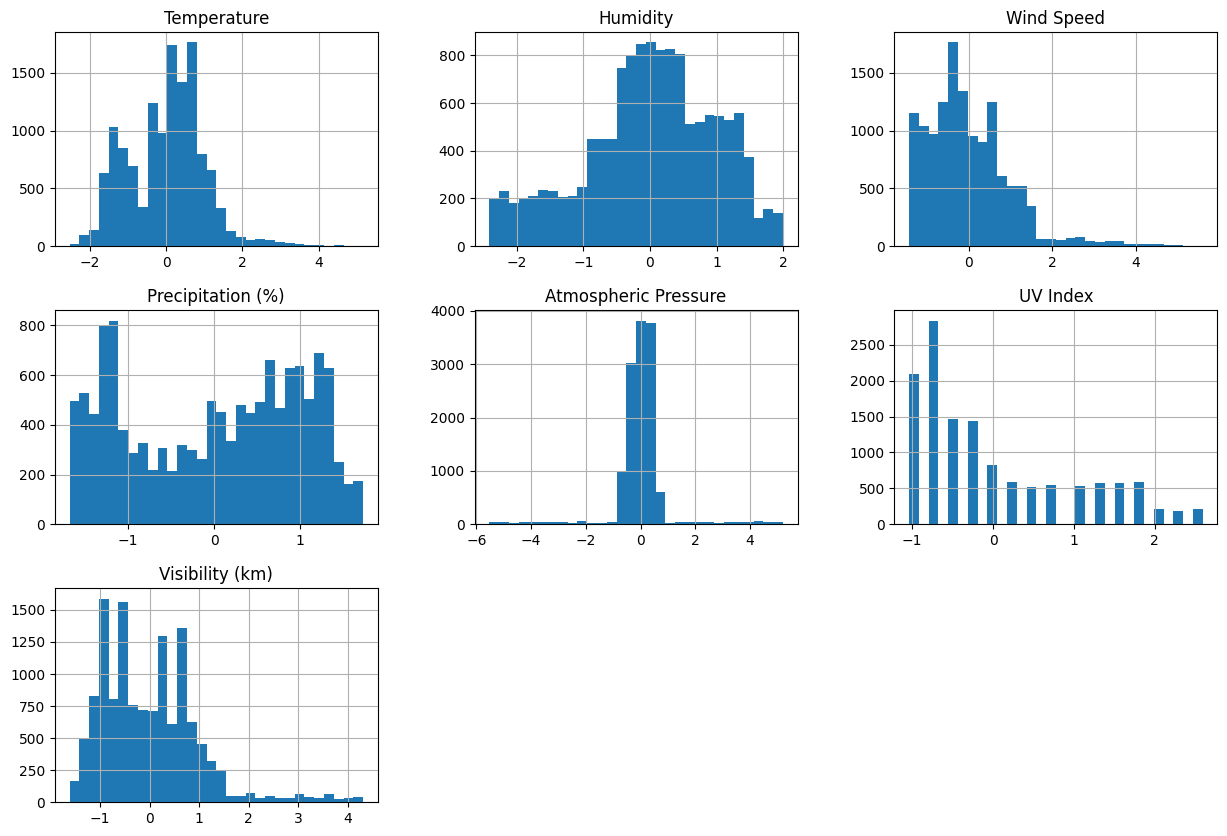

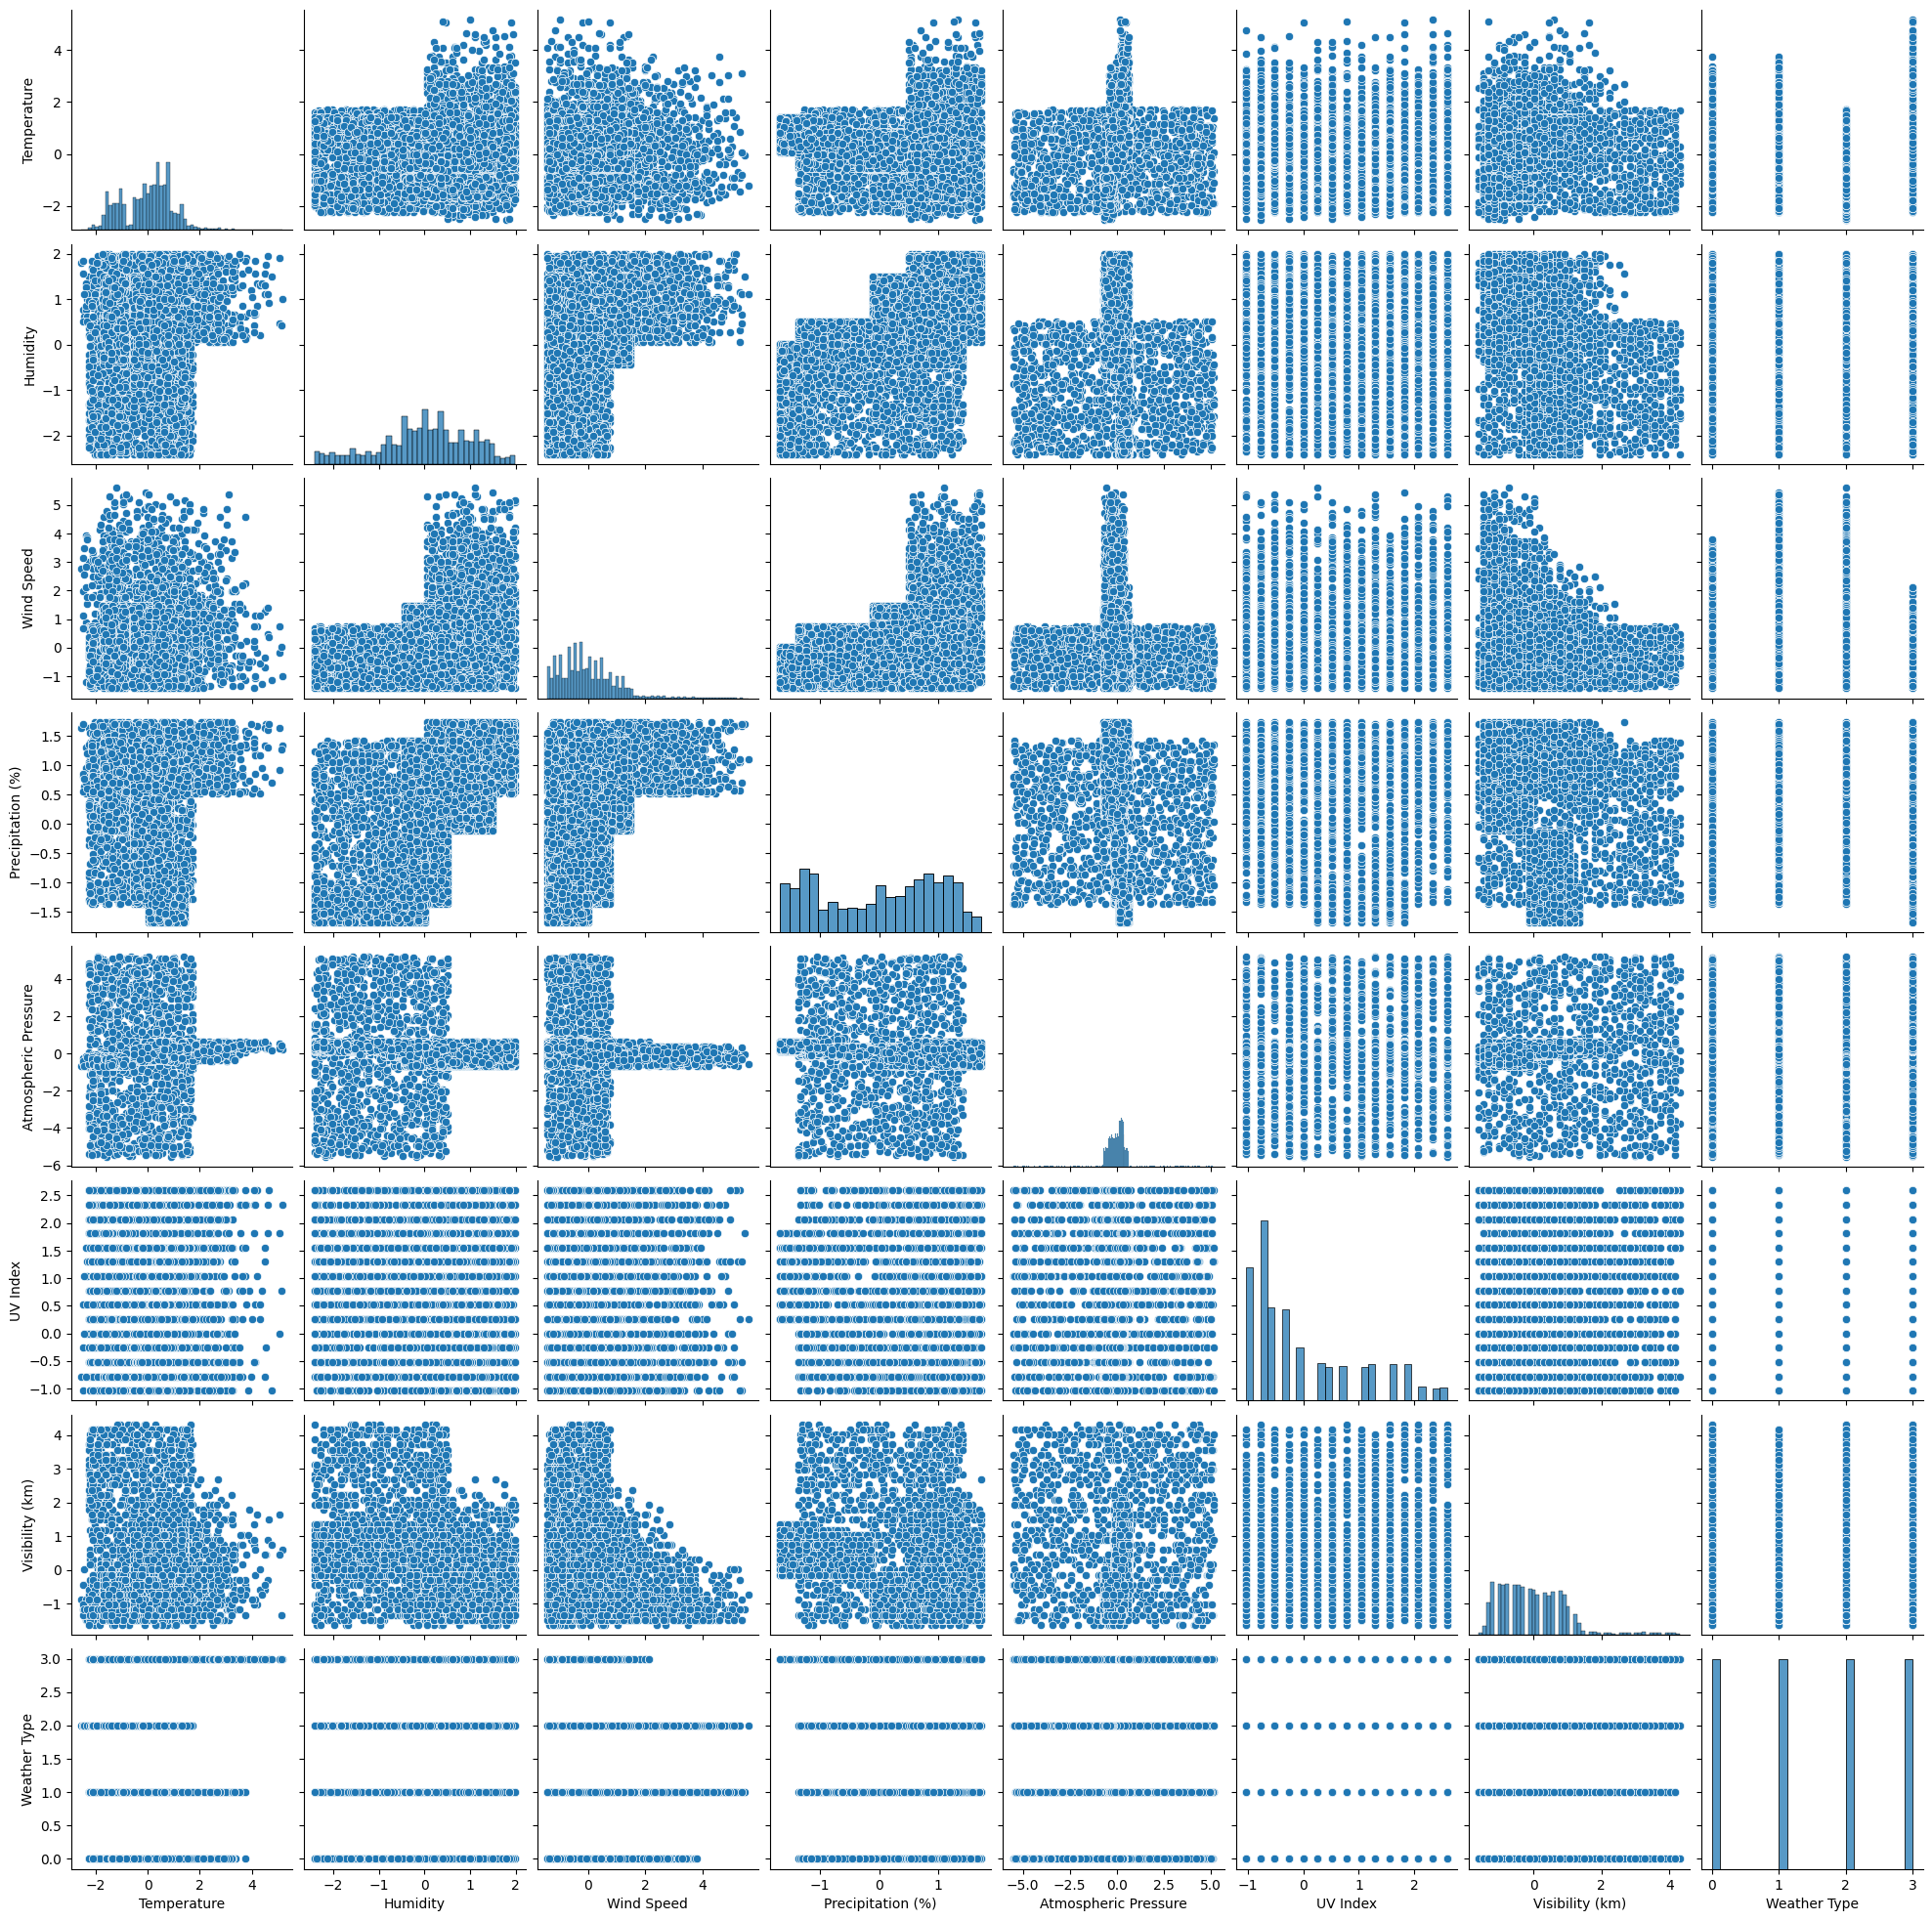

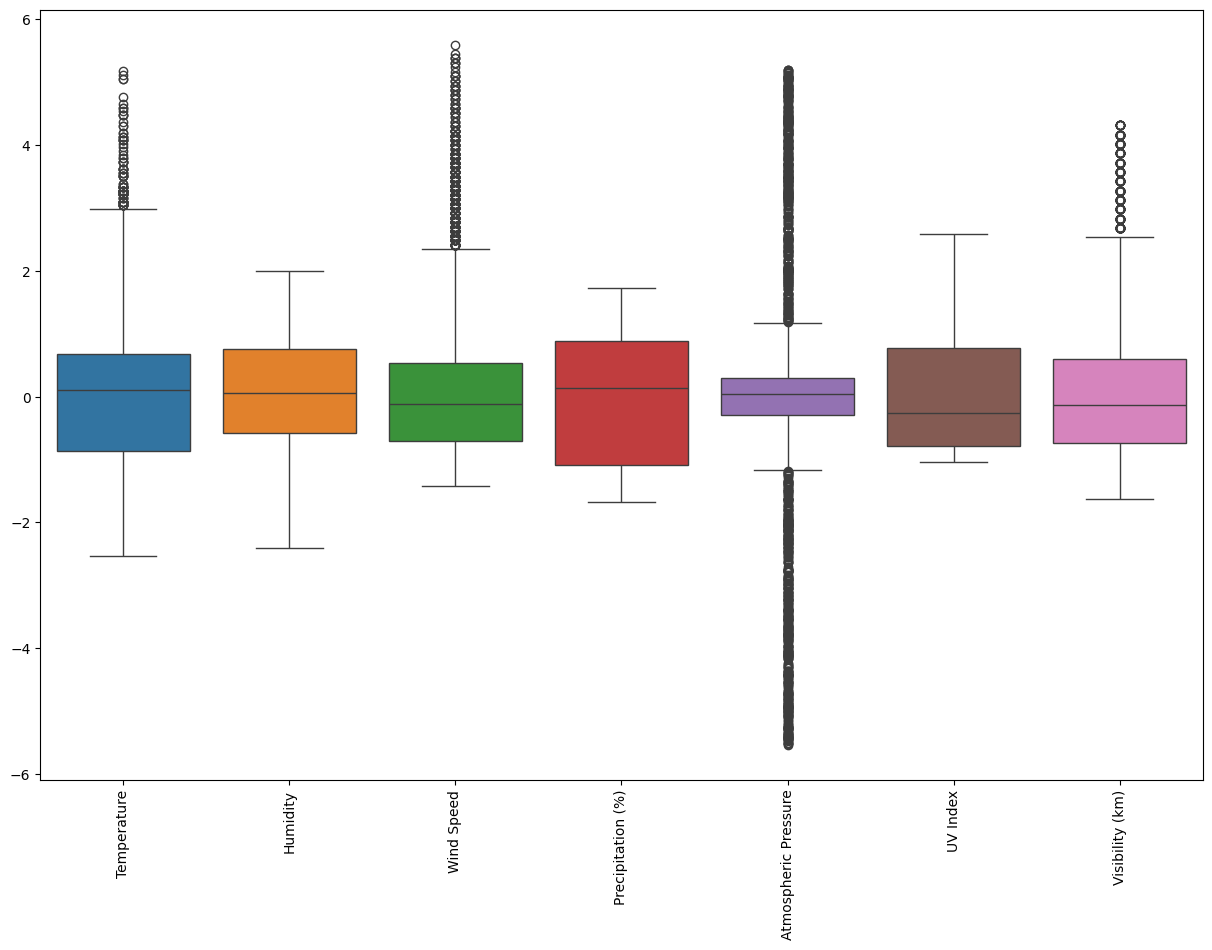

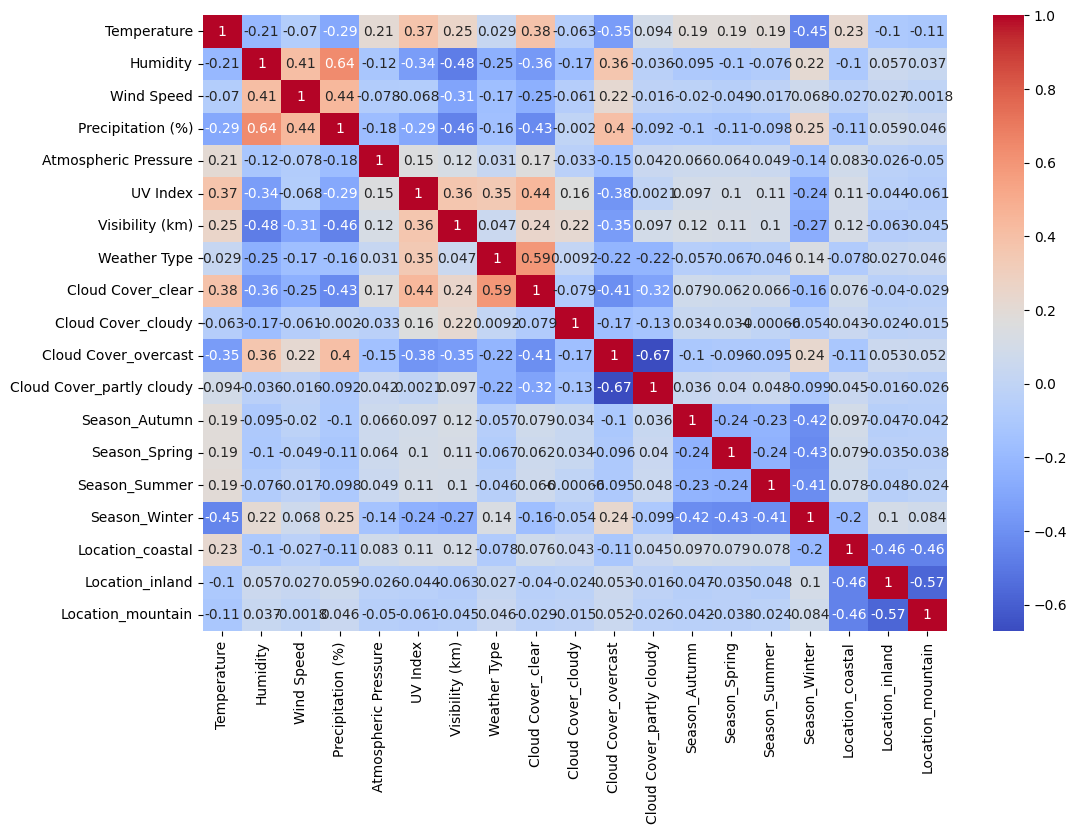

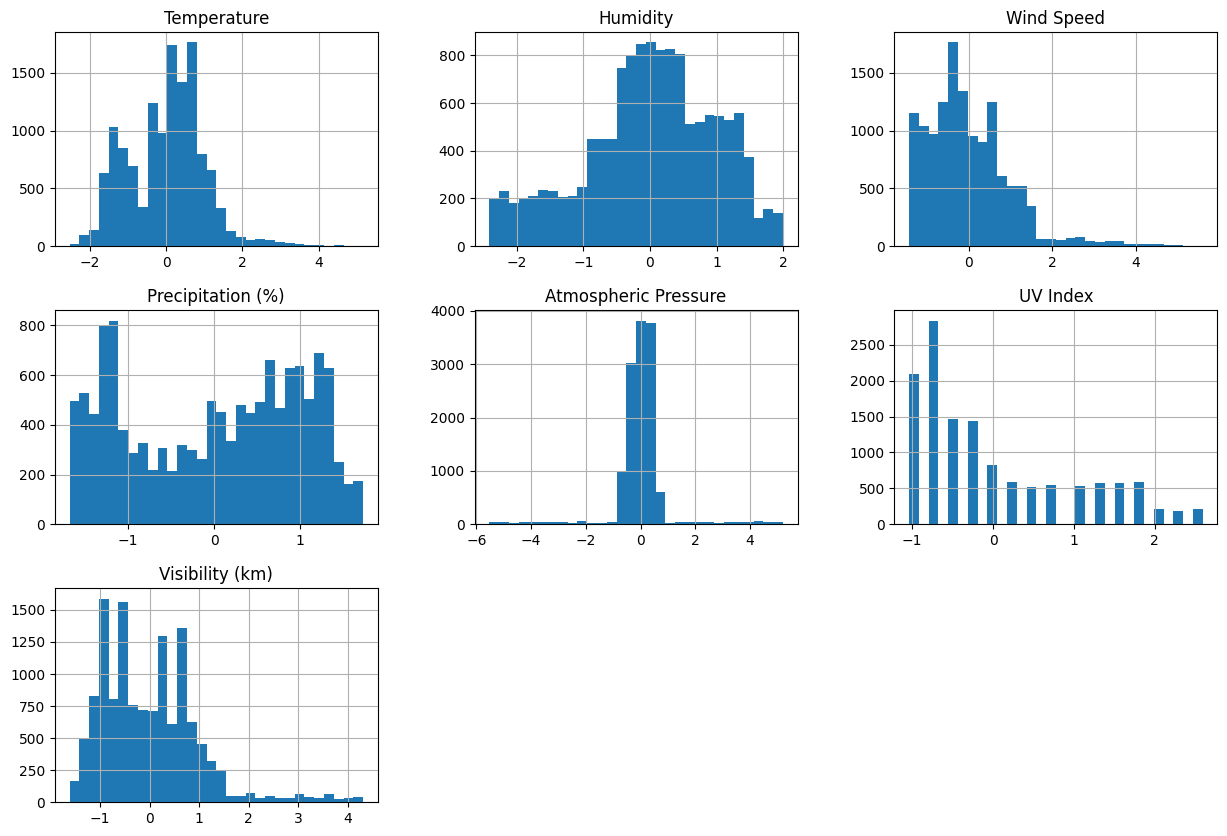

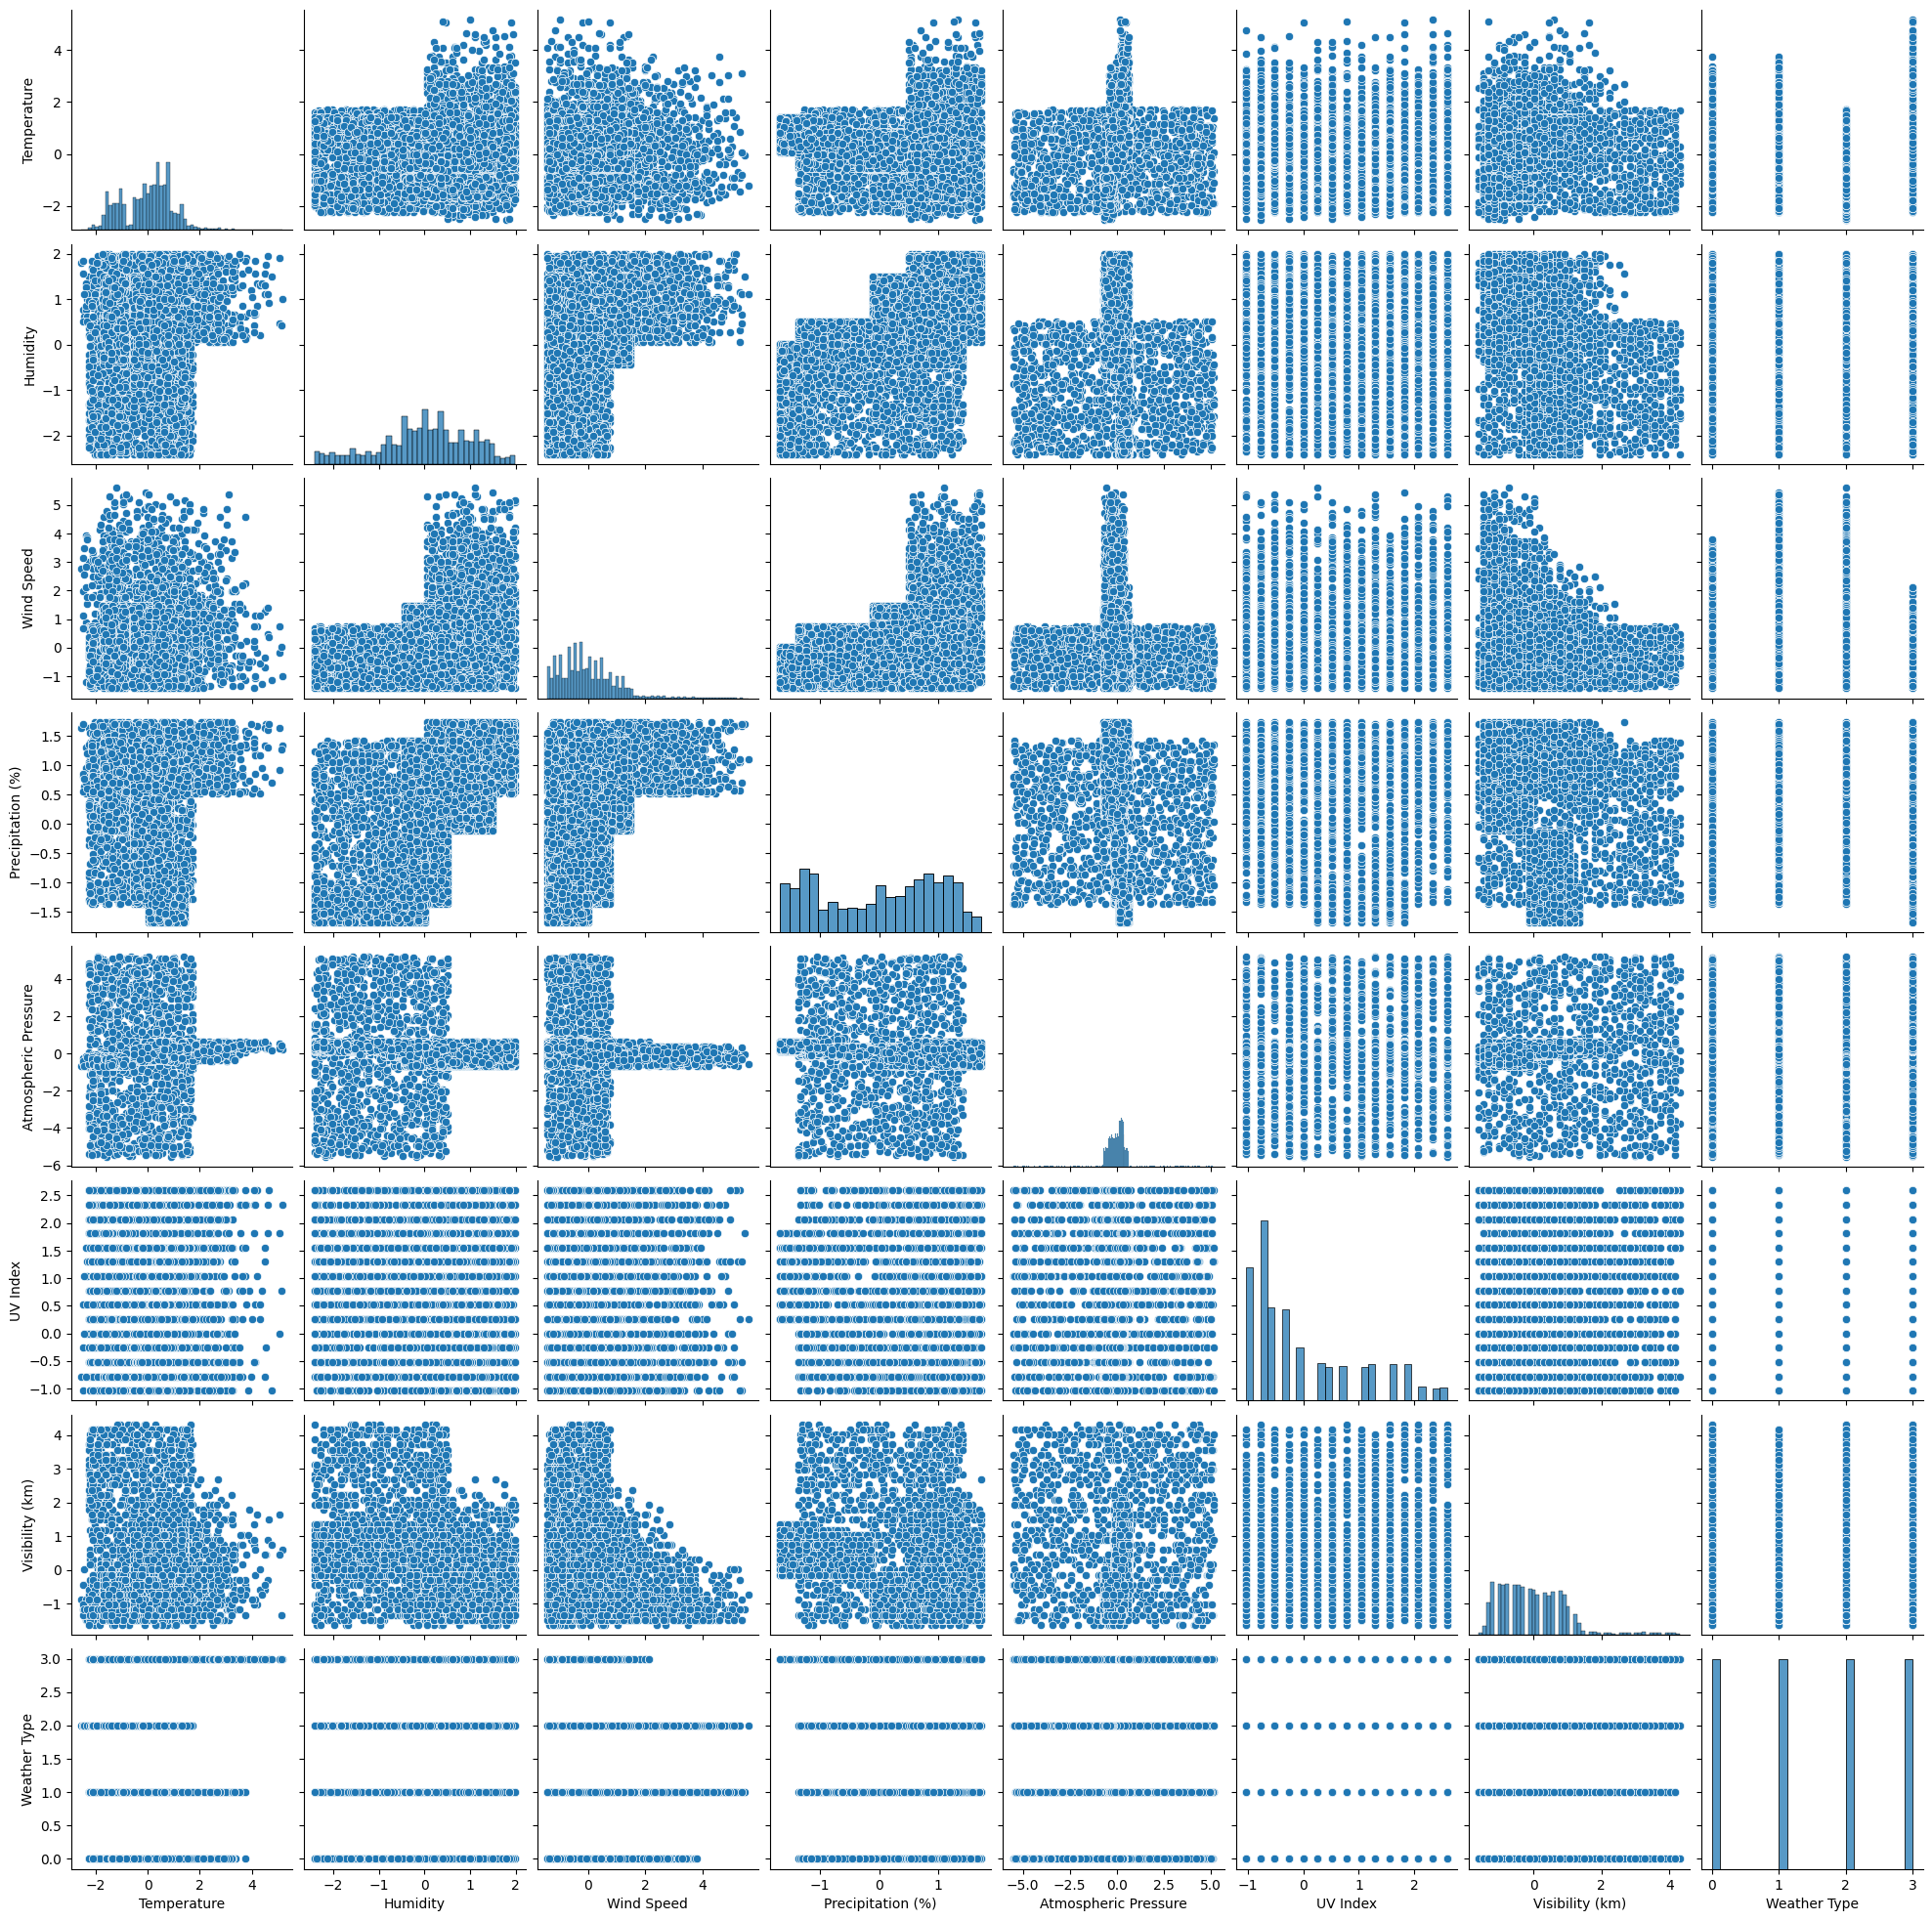

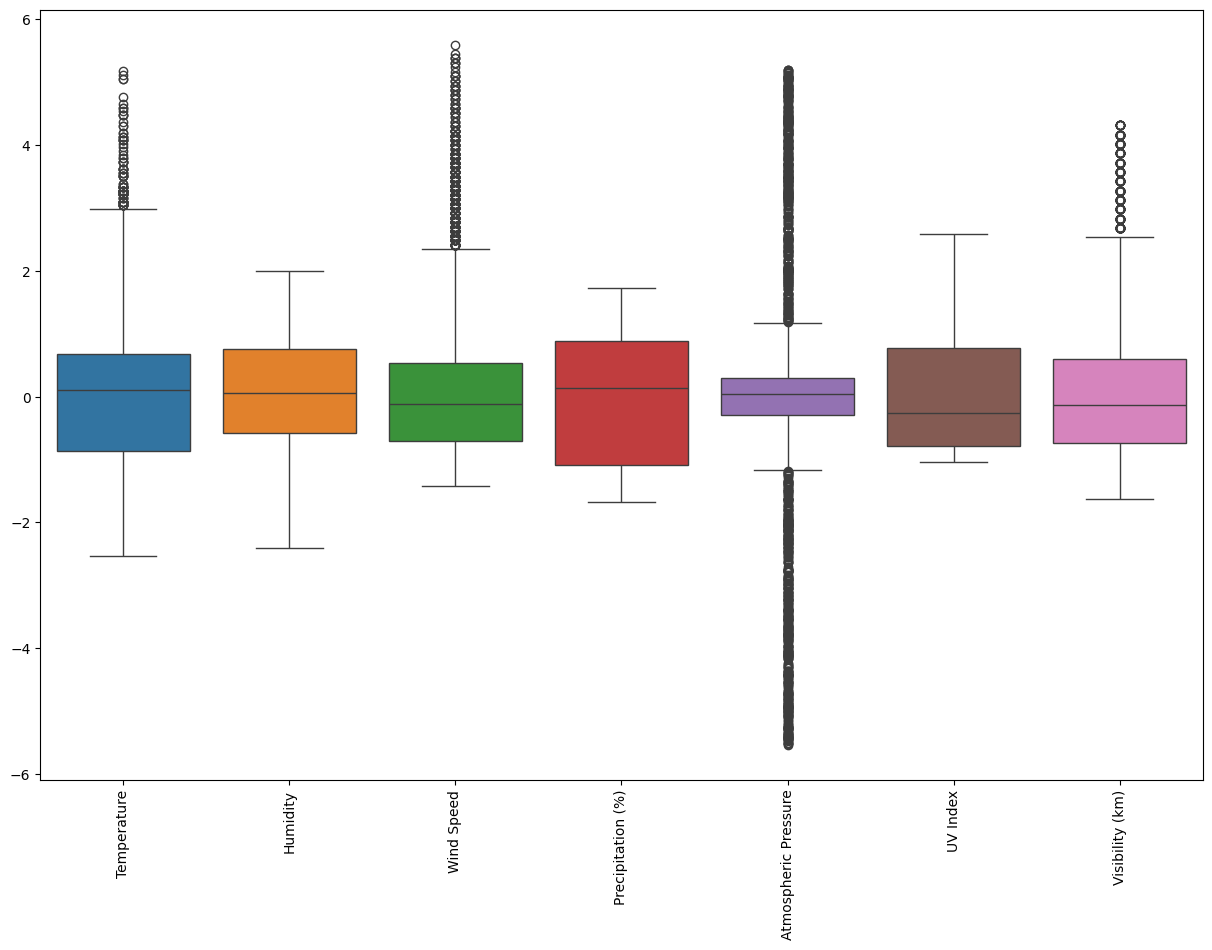

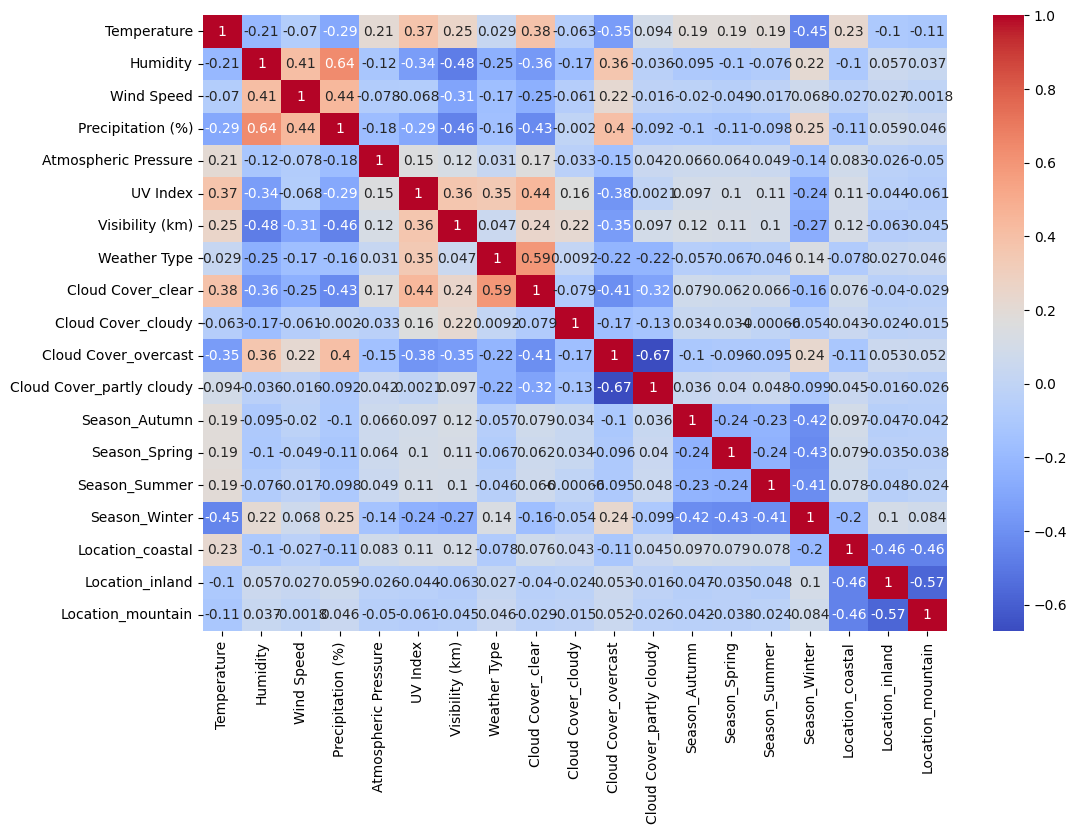

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8708333333333333
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       651
           1       0.86      0.84      0.85       647
           2       0.89      0.94      0.91       701
           3       0.92      0.86      0.89       641

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640

[[549  57  20  25]
 [ 46 543  50   8]
 [ 21   8 658  14]
 [ 52  25  15 549]]
Decision Tree Accuracy: 0.9098484848484848
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       651
           1       0.90      0.89      0.90       647
           2       0.93      0.94      0.94       701
           3       0.92      0.91      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg    

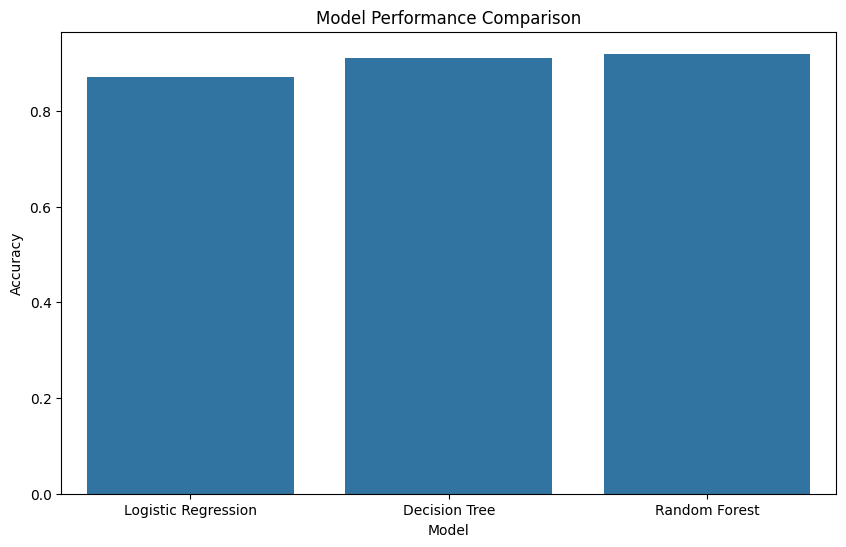

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

weather_data = pd.read_csv('weather_classification_data.csv')
print(weather_data.head())
print(weather_data.isnull().sum())

categorical_cols = ['Cloud Cover', 'Season', 'Location']
weather_data = pd.get_dummies(weather_data, columns=categorical_cols)

num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
scaler = StandardScaler()
weather_data[num_cols] = scaler.fit_transform(weather_data[num_cols])

weather_data['Weather Type'] = weather_data['Weather Type'].astype('category').cat.codes
print(weather_data.head())

X_features = weather_data.drop('Weather Type', axis=1)
y_target = weather_data['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
print(weather_data.describe())
corr_matrix = weather_data.corr()
print(corr_matrix)

weather_data[num_cols].hist(bins=30, figsize=(15, 10))
plt.show()

sns.pairplot(weather_data[num_cols + ['Weather Type']])
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=weather_data[num_cols])
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print(accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))
print(confusion_matrix(y_test, logistic_predictions))

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
tree_predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))
print(confusion_matrix(y_test, tree_predictions))

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
forest_predictions = random_forest.predict(X_test)
print(accuracy_score(y_test, forest_predictions))
print(classification_report(y_test, forest_predictions))
print(confusion_matrix(y_test, forest_predictions))

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
model_accuracies = [accuracy_score(y_test, logistic_predictions), accuracy_score(y_test, tree_predictions), accuracy_score(y_test, forest_predictions)]

performance_summary = pd.DataFrame({'Model': model_names, 'Accuracy': model_accuracies})
print(performance_summary)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_summary)
plt.title('Model Performance Comparison')
plt.show()



#Used Cars


    ad_ref  assembly       body ad_city                color  engine_cc  \
0  7927285  Imported        Van  Lahore          Pearl White     2000.0   
1  7679303  Imported  Hatchback  Lahore                 Grey      996.0   
2  7915479       NaN      Sedan  Lahore          Super white     1798.0   
3  7918380       NaN      Sedan  Lahore  Crystal Black Pearl     1500.0   
4  7676167  Imported        MPV  Lahore               Silver     3000.0   

  fuel_type    make  mileage    model     registered transmission    year  \
0    Hybrid  Nissan   124000   Serena  Un-Registered    Automatic  1905.0   
1    Petrol  Toyota    30738     Vitz         Punjab    Automatic  1905.0   
2    Petrol  Toyota   183000  Corolla         Punjab    Automatic  1905.0   
3    Petrol   Honda    41000    Civic         Punjab    Automatic  1905.0   
4    Petrol  Toyota   126000  Alphard         Punjab    Automatic  1905.0   

       price  
0  8990000.0  
1  4190000.0  
2  3990000.0  
3  6490000.0  
4  4750000.

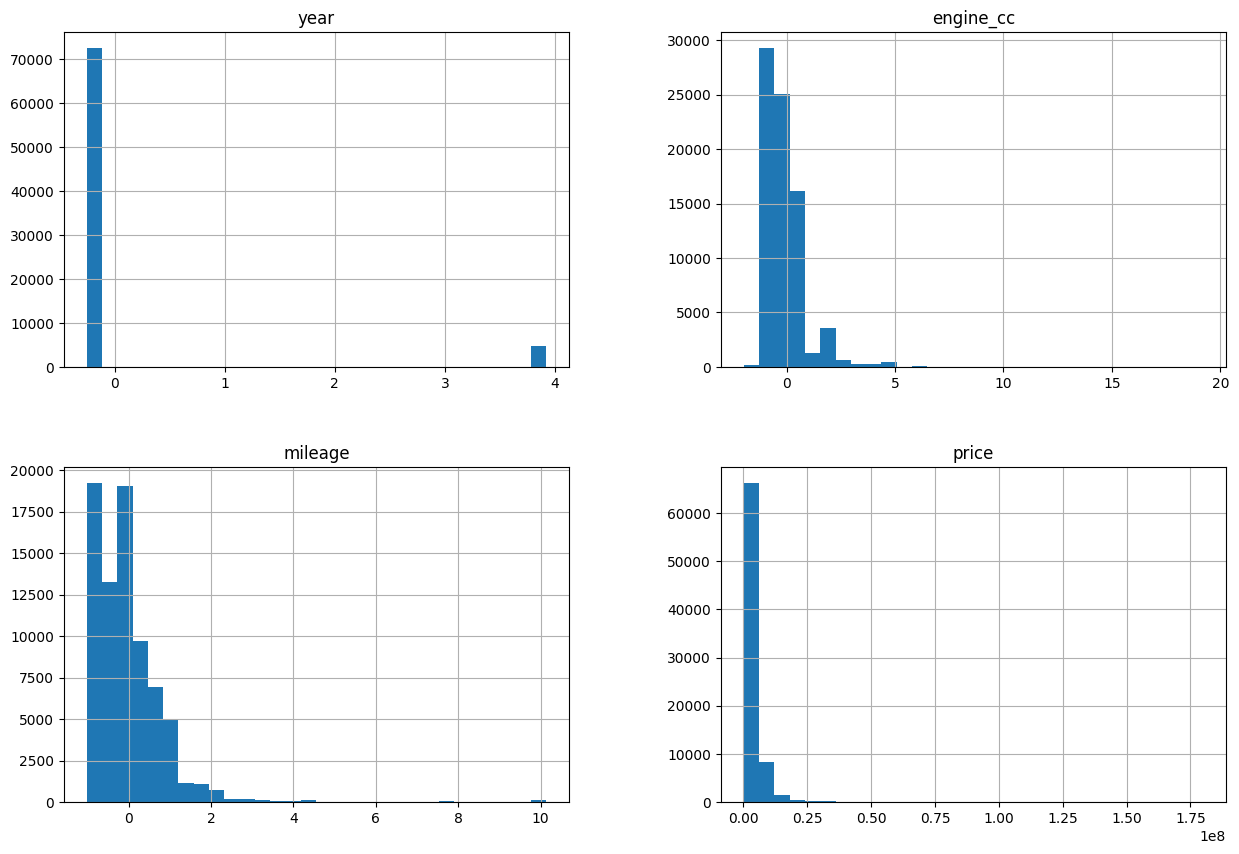

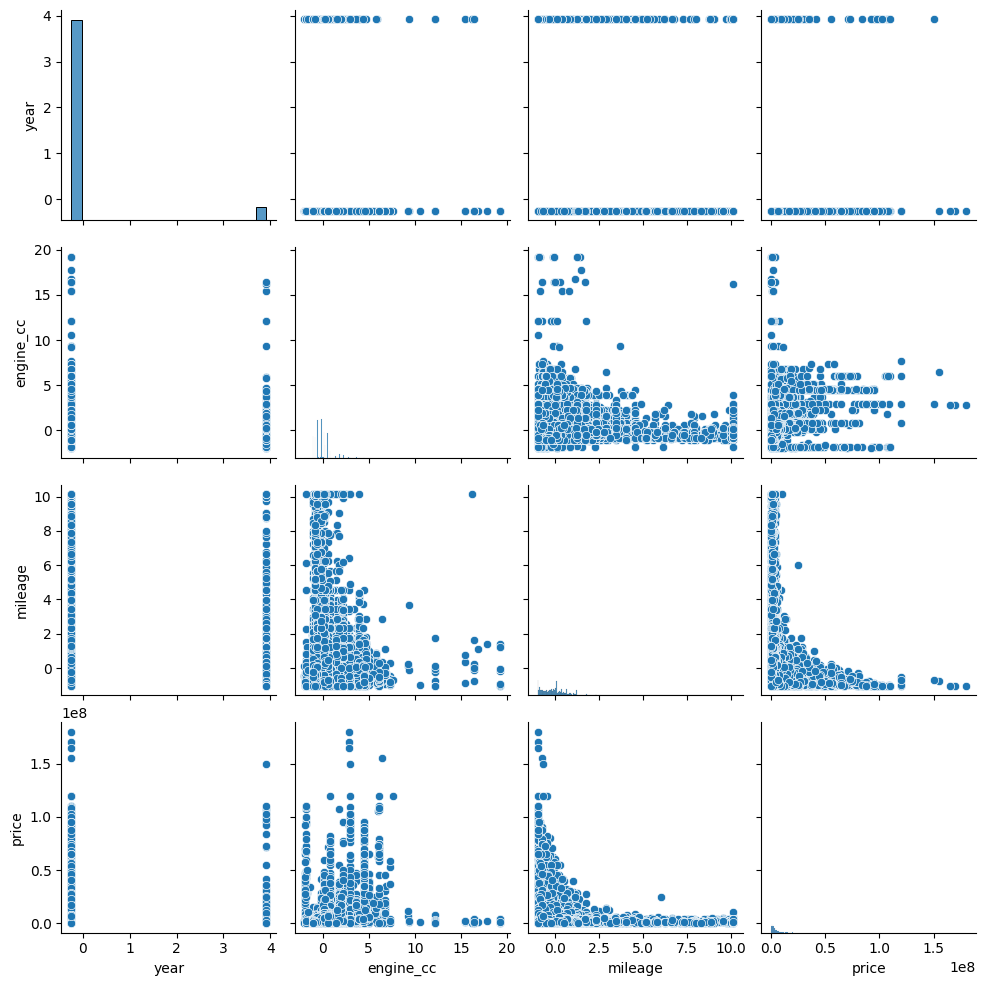

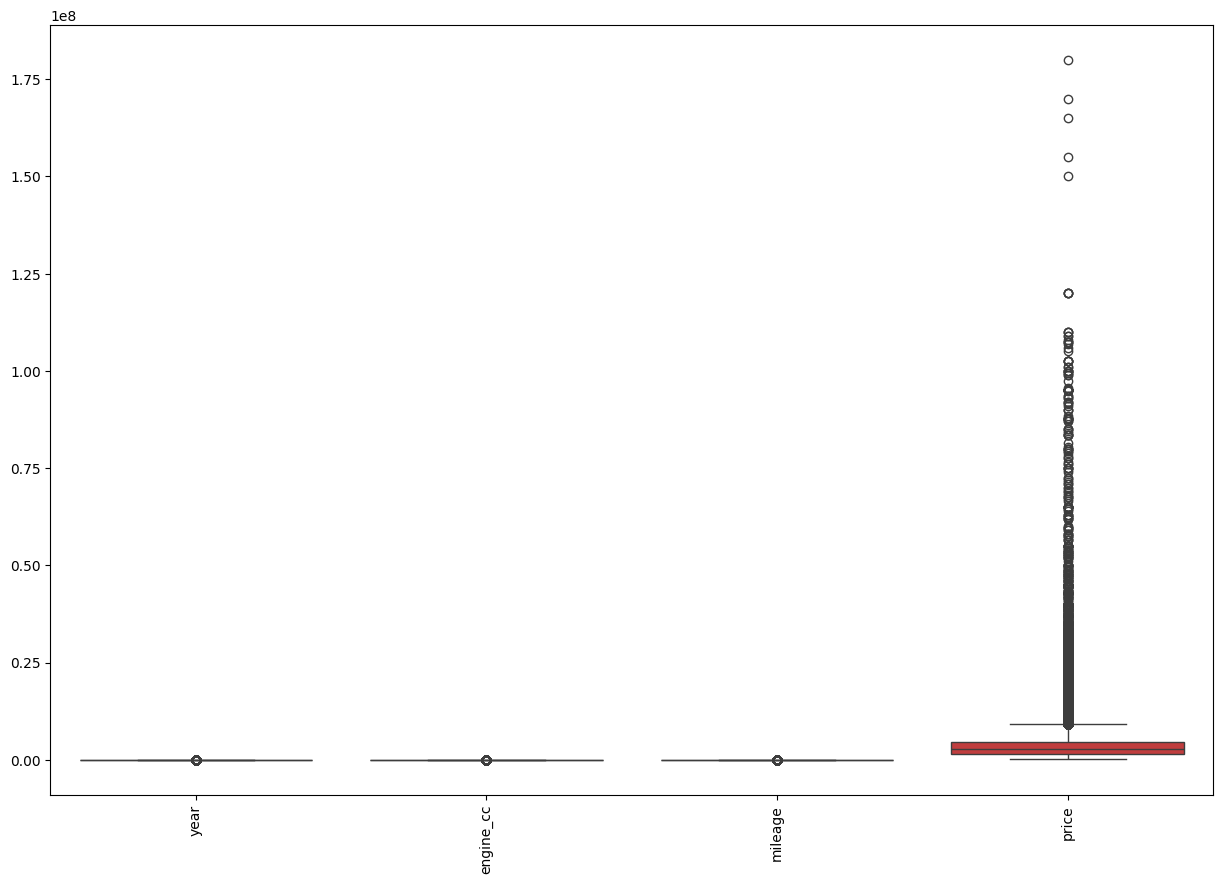

Linear Regression RMSE: 3425409.4036434833
Linear Regression R2 Score: 0.6116325874139905
Decision Tree RMSE: 3584914.0228981655
Decision Tree R2 Score: 0.5746217313856046
Random Forest RMSE: 2957630.1436822647
Random Forest R2 Score: 0.7104620213925965
               Model          RMSE  R2 Score
0  Linear Regression  3.425409e+06  0.611633
1      Decision Tree  3.584914e+06  0.574622
2      Random Forest  2.957630e+06  0.710462


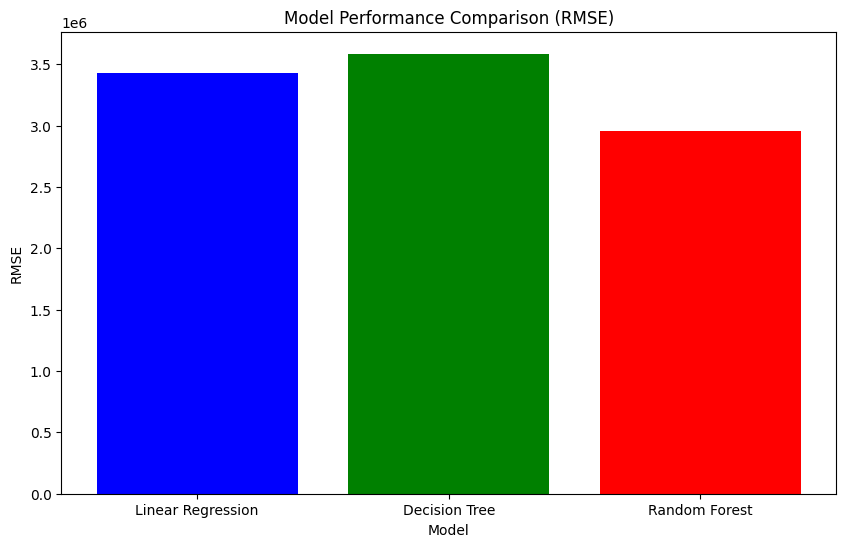

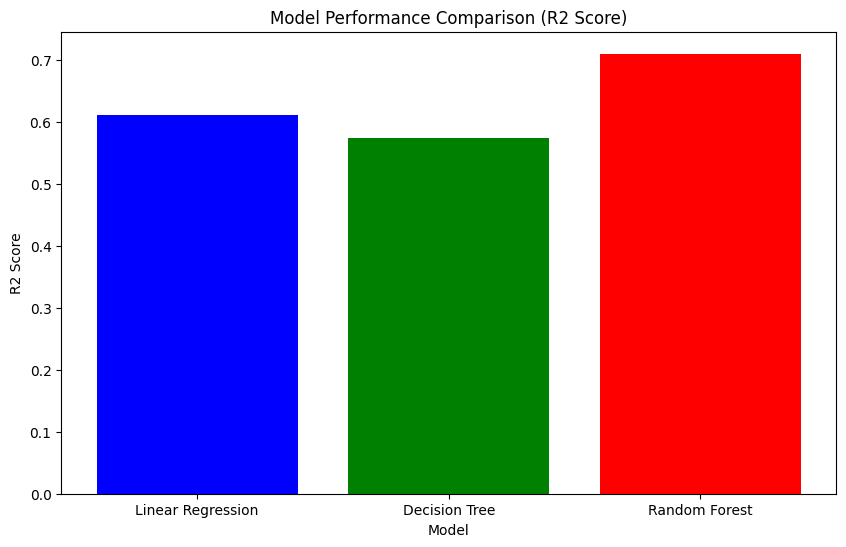

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

car_data = pd.read_csv('pakwheels_used_cars.csv')

print(car_data.head())
print(car_data.isnull().sum())

car_data['engine_cc'].fillna(car_data['engine_cc'].mean(), inplace=True)
car_data['mileage'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['assembly'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['body'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['color'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['fuel_type'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['year'].fillna(car_data['mileage'].mean(), inplace=True)
car_data['price'].fillna(car_data['mileage'].mean(), inplace=True)

car_data.dropna(subset=['price'], inplace=True)

categorical_columns = ['ad_city', 'assembly', 'body', 'make', 'model', 'transmission', 'fuel_type', 'color', 'registered']
car_data = pd.get_dummies(car_data, columns=categorical_columns)

numerical_columns = ['year', 'engine_cc', 'mileage']
scaler = StandardScaler()
car_data[numerical_columns] = scaler.fit_transform(car_data[numerical_columns])

print(car_data.head())

features = car_data.drop('price', axis=1)
target = car_data['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(car_data.describe())

car_data[numerical_columns + ['price']].hist(bins=30, figsize=(15, 10))
plt.show()

sns.pairplot(car_data[numerical_columns + ['price']])
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=car_data[numerical_columns + ['price']])
plt.xticks(rotation=90)
plt.show()

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred_lin_model = lin_model.predict(X_test)
print('Linear Regression RMSE:', mean_squared_error(y_test, pred_lin_model, squared=False))
print('Linear Regression R2 Score:', r2_score(y_test, pred_lin_model))

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
pred_dt_model = dt_model.predict(X_test)
print('Decision Tree RMSE:', mean_squared_error(y_test, pred_dt_model, squared=False))
print('Decision Tree R2 Score:', r2_score(y_test, pred_dt_model))

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
pred_rf_model = rf_model.predict(X_test)
print('Random Forest RMSE:', mean_squared_error(y_test, pred_rf_model, squared=False))
print('Random Forest R2 Score:', r2_score(y_test, pred_rf_model))

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_values = [mean_squared_error(y_test, pred_lin_model, squared=False),
               mean_squared_error(y_test, pred_dt_model, squared=False),
               mean_squared_error(y_test, pred_rf_model, squared=False)]
r2_values = [r2_score(y_test, pred_lin_model),
             r2_score(y_test, pred_dt_model),
             r2_score(y_test, pred_rf_model)]

performance_metrics = pd.DataFrame({'Model': model_names, 'RMSE': rmse_values, 'R2 Score': r2_values})
print(performance_metrics)

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red'])
plt.title('Model Performance Comparison (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color=['blue', 'green', 'red'])
plt.title('Model Performance Comparison (R2 Score)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

